In [10]:
# GHOST - Advection Test (2D)

import sys  
import numpy as np
import modepy as mp
sys.path.insert(0, '../src')
from Mesh import Mesh2D
from Discretization import SpatialDiscretization
from Solver import Solver

# discretization degree
p = 2

# geometry mapping degree
p_geo = 1

# read in mesh in GMSH format
mesh = Mesh2D("test", "../mesh/square_mesh_x_5y_5.msh")

# set up periodic boundary conditions
left = np.array([1.0,0.0,0.0]) 
right = np.array([1.0,0.0,1.0])
bottom = np.array([0.0,1.0,0.0])
top = np.array([0.0,1.0,1.0])
mesh.add_bc_on_hyperplanes([left,right,bottom,top],[1,2,3,4])
mesh.make_periodic((1,2),[1]) # left-right periodic (bcs parallel to axis 1)
mesh.make_periodic((3,4),[0]) # top-bottom periodic (axis 0)

#curvilinear transformation used in Del Rey Fernandez et al. (2017)
mesh.map_mesh(f_map=Mesh2D.grid_transformation(warp_factor=0.2), p_geo=p_geo)

# volume and facet quadrature degrees
tau = 2*p
mu = 2*p+1

theta = np.pi/4
a = np.sqrt(2)

# solver parameters
params = {"project_title": "adv_test_2d_p3qi",
         "problem": "constant_advection",
         "initial_condition": "sine",
         "wavelength": np.ones(2),
         "wave_speed": a*np.array([np.sin(theta),np.cos(theta)]),
         "upwind_parameter": 1.0,
         "integration_type": "quadrature",
         "solution_degree": p,
         "volume_quadrature_degree": tau,
         "facet_quadrature_degree": mu,
         "solution_representation": "modal",
         "form": "weak",
         "correction": "c_+",
         "time_integrator": "rk44",
         "final_time": 1.0,
         "time_step_scale": 0.1}

# set up solver
solver = Solver(params,mesh)

In [11]:
solver.run(write_interval=1.0)

dt =  0.0025
writing every  400  time steps, total  400
writing time step  400 : t =  0.9999999999999897


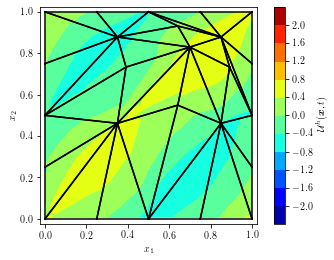

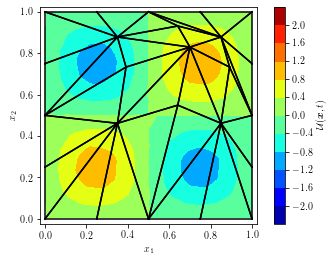

In [12]:
solver.post_process()
solver.plot(plot_numerical=True, plot_exact=True,
            plot_curves=True, plot_nodes=False, u_range=[-2,2])

In [5]:
#solver.plot_time_steps(framerate=4, u_range=[-1.5,1.5])

In [13]:
solver.calculate_error()

array([0.26954332])

In [27]:
M = solver.discretization.M[0]
K = solver.discretization.K[0]
D = solver.discretization.Dhat[0][1]
M_f = [solver.discretization.V_gamma[0][gamma].T @ solver.discretization.W_gamma[0][gamma] @ solver.discretization.V_gamma[0][gamma] for gamma in range(0,3)
    ]
n_f = solver.discretization.n_hat[0]

In [28]:
(M+K) @ D + D.T @ (M+K) - sum([M_f[gamma]*n_f[gamma][1] for gamma in range(0,3)])

array([[ 0.00000000e+00, -1.33226763e-15, -4.44089210e-16,
        -3.10862447e-15, -1.11022302e-16,  2.22044605e-15],
       [-1.33226763e-15,  1.63252258e-15, -3.99680289e-15,
         2.61290568e-16, -6.21724894e-15,  2.64301601e-16],
       [-4.44089210e-16, -4.88498131e-15,  7.59419003e-15,
        -2.44249065e-15,  1.42902307e-14,  7.12703041e-15],
       [-3.10862447e-15,  2.95573583e-16, -2.72004641e-15,
        -2.01840709e-16, -4.44089210e-15, -3.55271368e-15],
       [-4.44089210e-16, -6.21724894e-15,  1.43333294e-14,
        -3.99680289e-15,  5.43809552e-15, -1.31417393e-14],
       [ 1.99840144e-15,  1.27633932e-16,  7.37723666e-15,
        -3.55271368e-15, -1.27699858e-14, -3.54043519e-15]])